   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

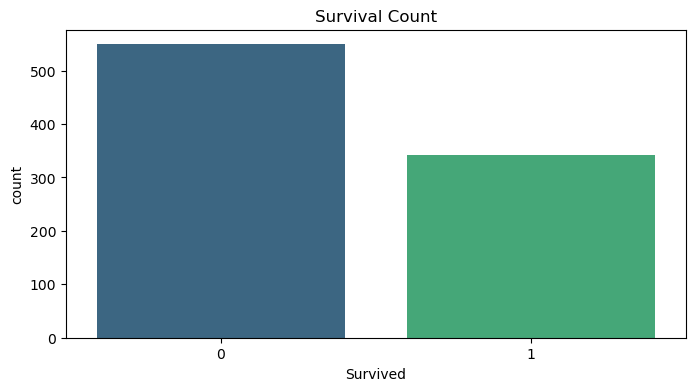

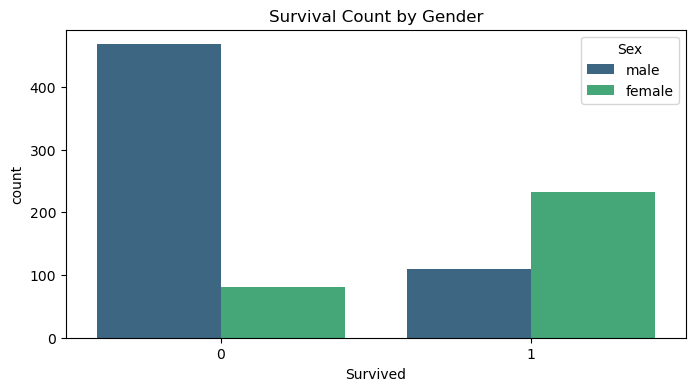

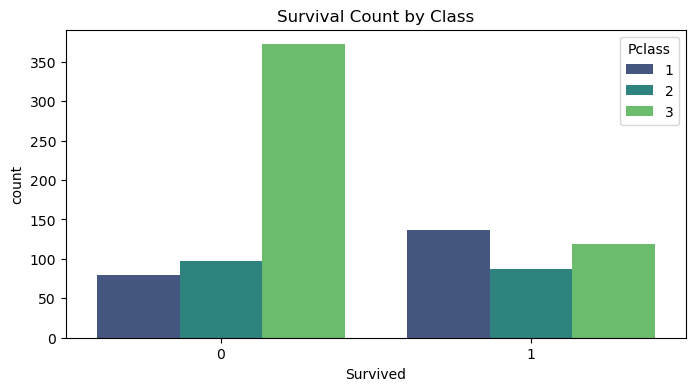

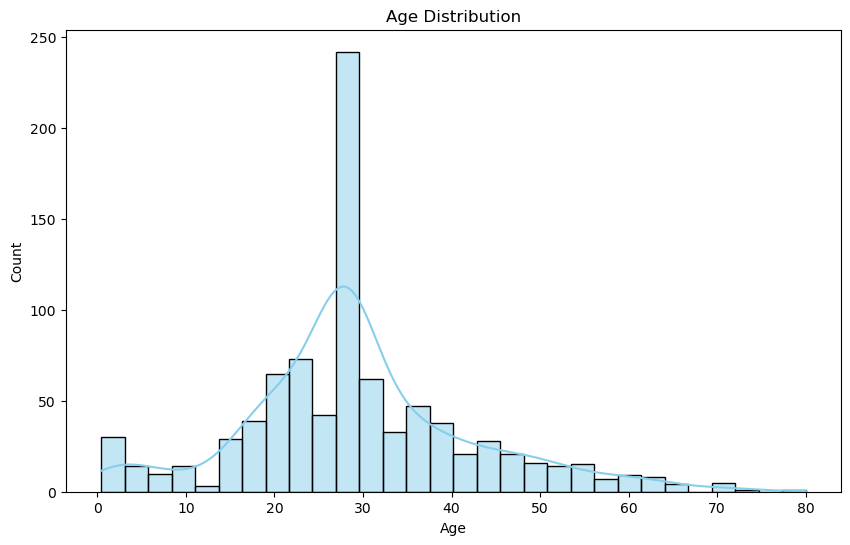

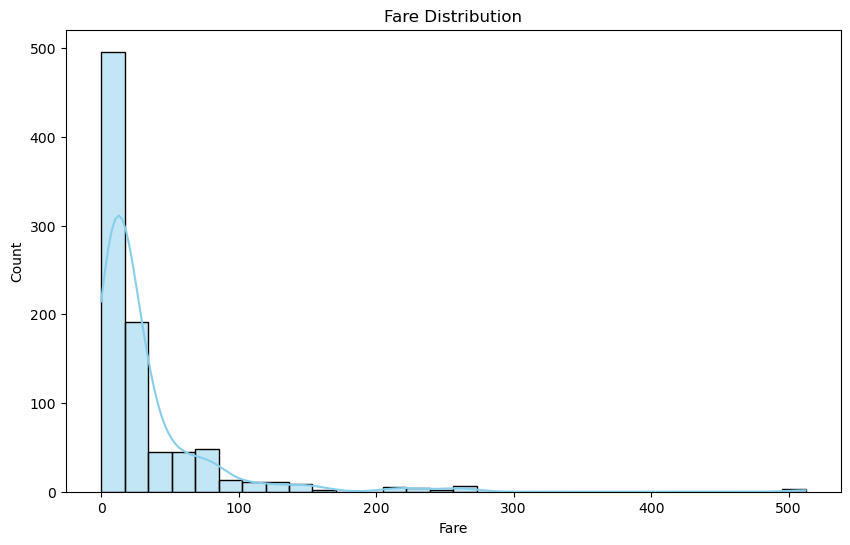

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


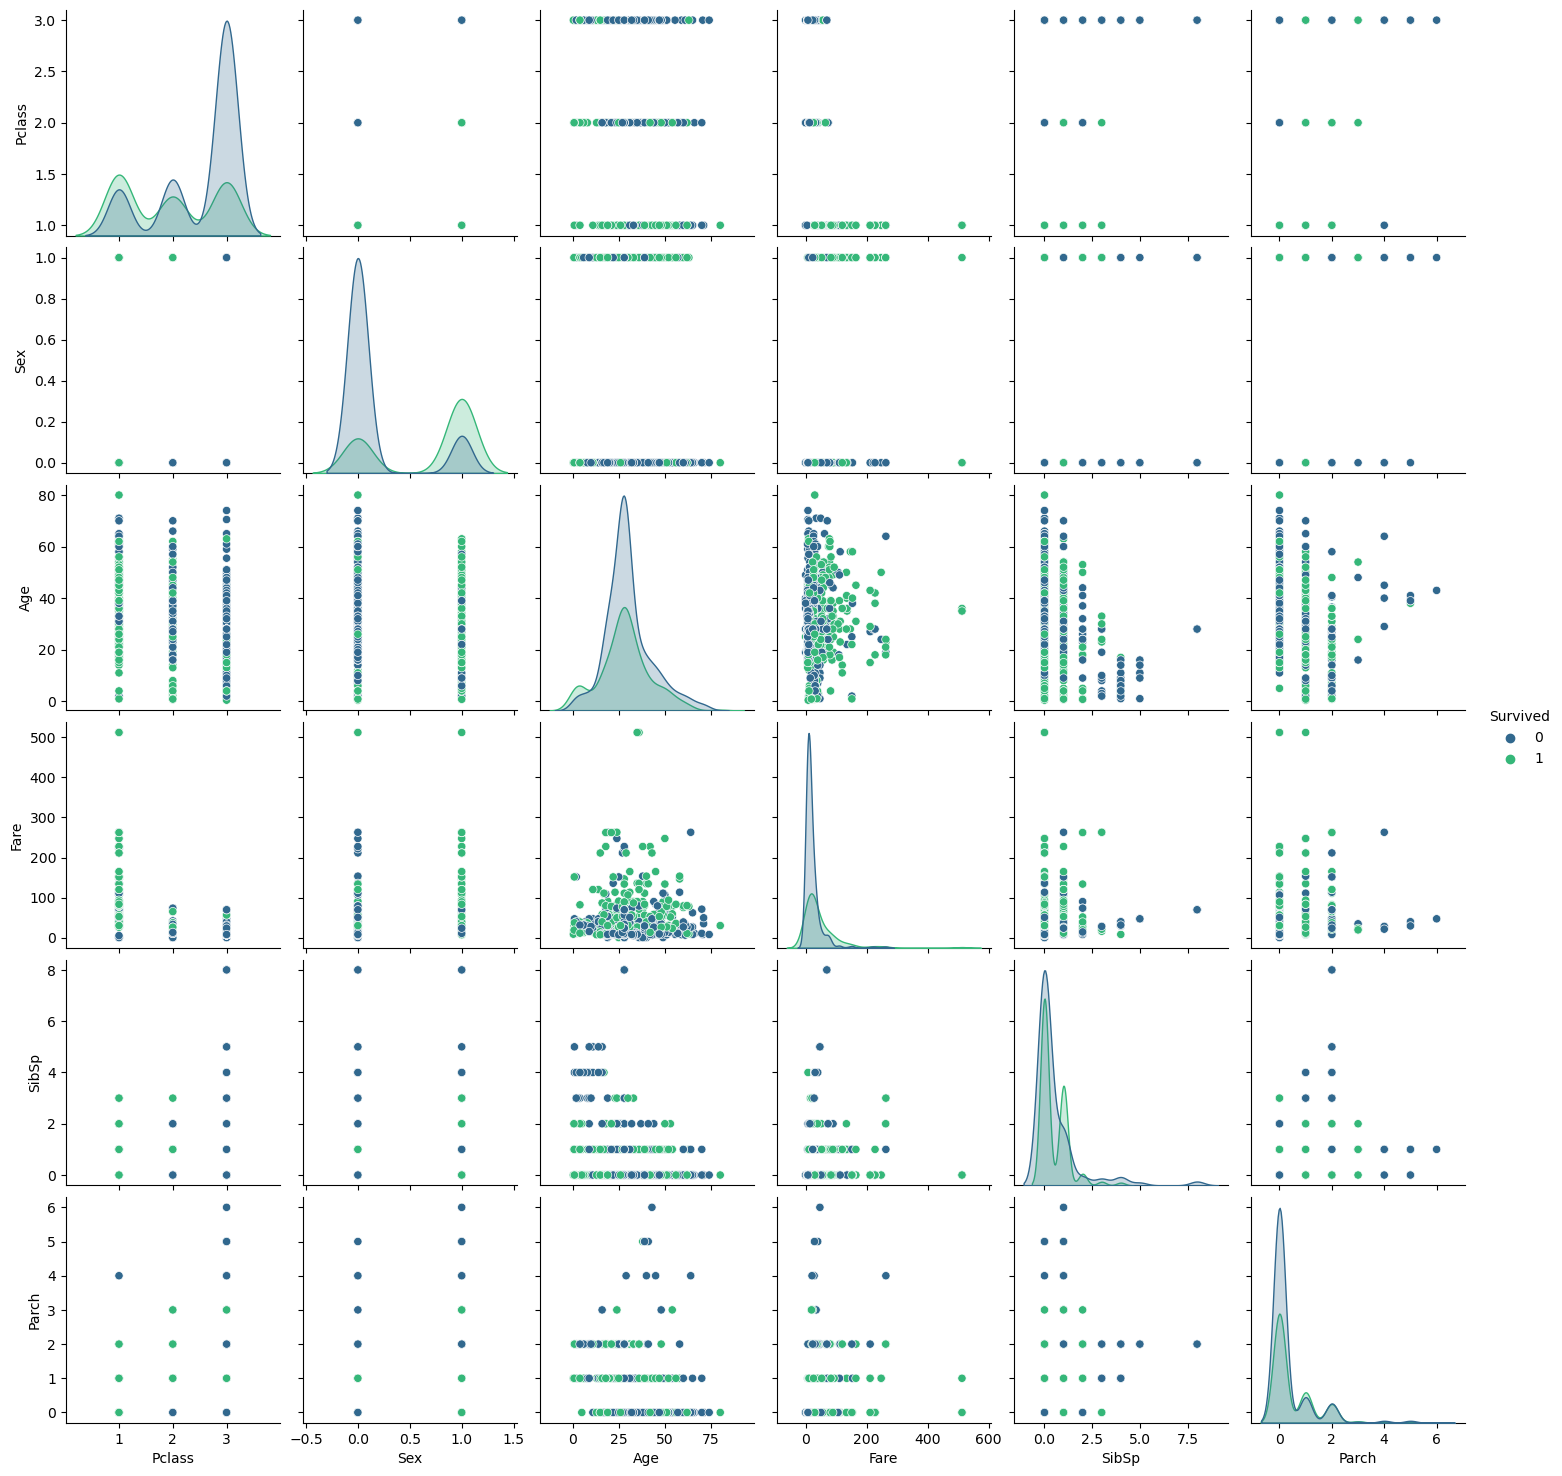

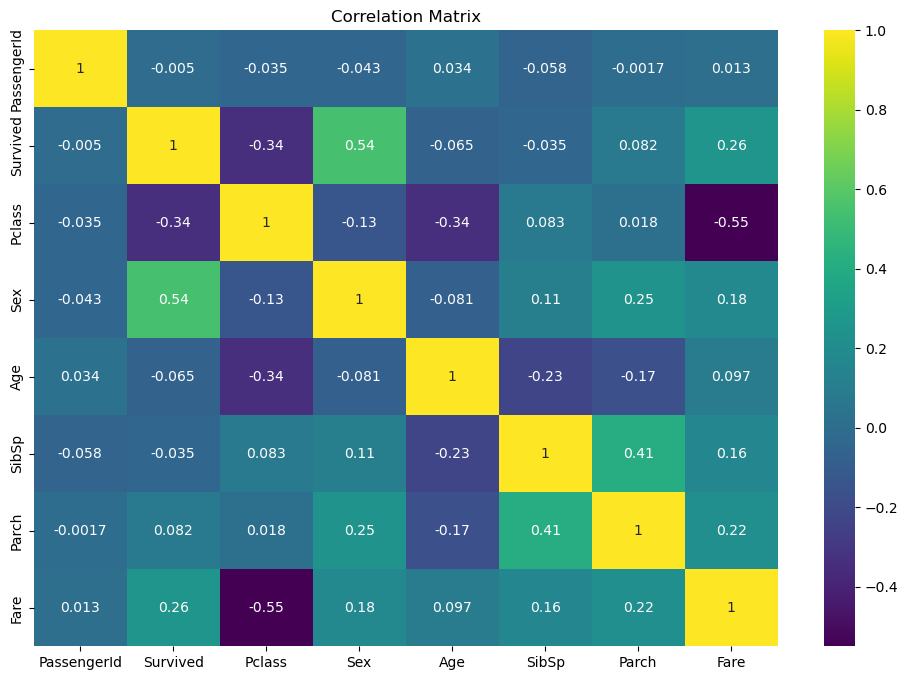

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the local directory
train_url = 'C:\\Users\\user\\Downloads\\titanic\\train.csv'
test_url = 'C:\\Users\\user\\Downloads\\titanic\\test.csv'

# Load the dataset
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

# Display the first few rows of the training dataset to understand its structure
print(df_train.head())

# Data Cleaning
# Check for missing values
print(df_train.isnull().sum())

# Fill missing values for 'Age' with the median age
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode (most frequent value)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

# 'Cabin' has many missing values, so we will drop this column
df_train.drop(columns=['Cabin'], inplace=True)

# 'Fare' has a missing value in the test set, so we fill it with the median fare in the test set
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

# Verify that there are no more missing values
print(df_train.isnull().sum())

# Exploratory Data Analysis (EDA)
# Visualization of Survived vs Not Survived
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', data=df_train, palette='viridis')
plt.title('Survival Count')
plt.show()

# Survival rate by gender
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='viridis')
plt.title('Survival Count by Gender')
plt.show()

# Survival rate by class
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Pclass', data=df_train, palette='viridis')
plt.title('Survival Count by Class')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

# Fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Fare'], bins=30, kde=True, color='skyblue')
plt.title('Fare Distribution')
plt.show()

# Pairplot to see relationships between variables
# Convert 'Sex' to numeric values for pairplot
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
sns.pairplot(df_train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].dropna(), hue='Survived', palette='viridis')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation matrix
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_train[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()
